In [6]:
import pandas as pd                   # Python data analysis package 


# URL for Annual Population by Age and Sex - Department of Economic and Social Affairs, United Nations
source = "https://github.com/PacktPublishing/Matplotlib-2.x-By-Example/blob/master/WPP2015_DB04_Population_Annual.zip"

population_df = pd.read_csv(source, header=0, compression='zip', encoding='latin_1') # Pandas support both local or online files 
population_df.head() # Show the first five rows of the DataFrame

,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,Value
0,4,Afghanistan,2,Medium,1950,1950.5,1,Male,0-4,0,5,630.044
1,4,Afghanistan,2,Medium,1950,1950.5,1,Male,5-9,5,5,516.205
2,4,Afghanistan,2,Medium,1950,1950.5,1,Male,10-14,10,5,461.378
3,4,Afghanistan,2,Medium,1950,1950.5,1,Male,15-19,15,5,414.368
4,4,Afghanistan,2,Medium,1950,1950.5,1,Male,20-24,20,5,374.110


`pip install pycountry`

In [9]:
from pycountry import countries


def get_alpha_3(location):
    """Convert full country name to three letter code (ISO 3166 alpha-3)
     
    Args:
        location: Full location name
    Returns:
        three letter code or None if not found"""
    
    try:
        return countries.get(name=location).alpha_3
    except:
        return None
    
# Add a new country column to the dataframe
population_df['country'] = population_df['Location'].apply(lambda x: get_alpha_3(x))
population_df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,Value,country
0,4,Afghanistan,2,Medium,1950,1950.5,1,Male,0-4,0,5,630.044,AFG
1,4,Afghanistan,2,Medium,1950,1950.5,1,Male,5-9,5,5,516.205,AFG
2,4,Afghanistan,2,Medium,1950,1950.5,1,Male,10-14,10,5,461.378,AFG
3,4,Afghanistan,2,Medium,1950,1950.5,1,Male,15-19,15,5,414.368,AFG
4,4,Afghanistan,2,Medium,1950,1950.5,1,Male,20-24,20,5,374.110,AFG


In [1]:
from urllib.request import urlopen
import json
import time
import pandas as pd


def get_bigmac_codes():
    """Get a Pandas DataFrame of all codes in the Big Mac index dataset

    The first column contains the code, while the second header
    contains the description of the code.
    
    E.g. 
    ECONOMIST/BIGMAC_ARG,Big Mac Index - Argentina
    ECONOMIST/BIGMAC_AUS,Big Mac Index - Australia
    ECONOMIST/BIGMAC_BRA,Big Mac Index - Brazil
    
    Returns:
        codes: Pandas DataFrame of Quandl dataset codes"""
    
    codes_url = "https://www.quandl.com/api/v3/databases/ECONOMIST/codes"
    codes = pd.read_csv(codes_url, header=None, names=['Code', 'Description'], 
                        compression='zip', encoding='latin_1')
    
    return codes

    
def get_quandl_dataset(api_key, code):
    """Obtain and parse a quandl dataset in Pandas DataFrame format

    Quandl returns dataset in JSON format, where data is stored as a 
    list of lists in response['dataset']['data'], and column headers
    stored in response['dataset']['column_names'].
    
    E.g. {'dataset': {...,
             'column_names': ['Date',
                              'local_price',
                              'dollar_ex',
                              'dollar_price',
                              'dollar_ppp',
                              'dollar_valuation',
                              'dollar_adj_valuation',
                              'euro_adj_valuation',
                              'sterling_adj_valuation',
                              'yen_adj_valuation',
                              'yuan_adj_valuation'],
             'data': [['2017-01-31',
                       55.0,
                       15.8575,
                       3.4683903515687,
                       10.869565217391,
                       -31.454736135007,
                       6.2671477203176,
                       8.2697553162259,
                       29.626894343348,
                       32.714616745128,
                       13.625825886047],
                      ['2016-07-31',
                       50.0,
                       14.935,
                       3.3478406427854,
                       9.9206349206349,
                       -33.574590420925,
                       2.0726096168216,
                       0.40224795003514,
                       17.56448458418,
                       19.76377270142,
                       11.643103380531]
                      ],
             'database_code': 'ECONOMIST',
             'dataset_code': 'BIGMAC_ARG',
             ... }}
    
    A custom column--country is added to denote the 3-letter country code.
    
    Args:
        api_key: Quandl API key
        code: Quandl dataset code

    Returns:
        df: Pandas DataFrame of a Quandl dataset

    """
    base_url = "https://www.quandl.com/api/v3/datasets/"
    url_suffix = ".json?api_key="

    # Fetch the JSON response 
    u = urlopen(base_url + code + url_suffix + api_key)
    response = json.loads(u.read().decode('utf-8'))
    
    # Format the response as Pandas Dataframe
    df = pd.DataFrame(response['dataset']['data'], columns=response['dataset']['column_names'])
    
    # Label the country code
    df['country'] = code[-3:]
    
    return df


quandl_dfs = []
codes = get_bigmac_codes()

# Replace this with your own API key
api_key = "sGHKyHvLbvH1_yfvnUyb" 

for code in codes.Code:
    # Get the DataFrame of a Quandl dataset
    df = get_quandl_dataset(api_key, code)
    
    # Store in a list
    quandl_dfs.append(df)
    
    # Prevents exceeding the API speed limit
    time.sleep(2)
    
    
# Concatenate the list of dataframes into a single one    
bigmac_df = pd.concat(quandl_dfs)
bigmac_df.head()

,Date,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation,country
0,2017-01-31,55.0,15.85750,3.468390,10.869565,-31.454736,6.26715,8.26976,29.6269,32.7146,13.6258,ARG
1,2016-07-31,50.0,14.93500,3.347841,9.920635,-33.574590,2.07261,0.402248,17.5645,19.7638,11.6431,ARG
2,2016-01-31,33.0,13.80925,2.389703,6.693712,-51.527332,-24.8619,-18.714,-18.7209,0.40859,-17.029,ARG
3,2015-07-31,28.0,9.13500,3.065134,5.845511,-36.009727,-4.7585,-0.357918,-6.01091,30.8609,5.02868,ARG
4,2015-01-31,28.0,8.61000,3.252033,5.845511,-32.107881,0.540242,-0.804495,-2.49468,34.3905,6.01183,ARG


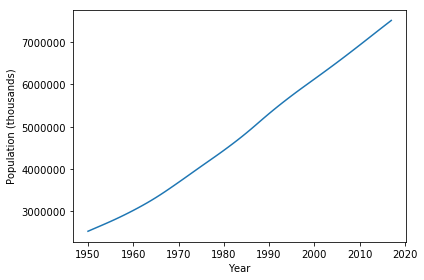

In [7]:
import matplotlib.pyplot as plt


# Select the aggregated population data from the world for both genders, during 1950 to 2017.
selected_data = population_df[(population_df.Location == 'WORLD') & 
                              (population_df.Sex == 'Both') & 
                              (population_df.Time <= 2017) ]

# Calculate aggregated population data across all age groups for each year 
# Set as_index=False to avoid the Time variable to be used as index
grouped_data = selected_data.groupby('Time', as_index=False).sum()

# Generate a simple line plot of population vs time
fig = plt.figure()
plt.plot(grouped_data.Time, grouped_data.Value)

# Label the axis
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.tight_layout()
plt.savefig("B07915_04_trend.png", dpi=300)
plt.show()

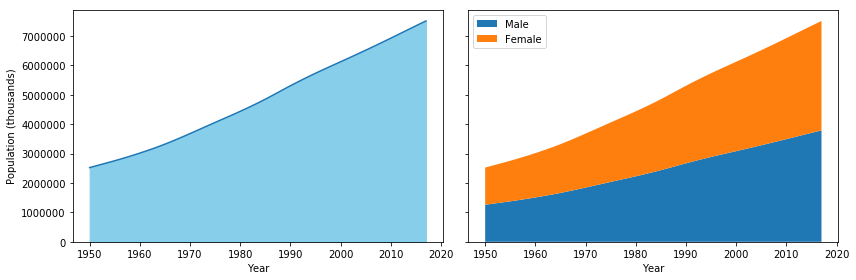

In [8]:
# Select the aggregated population data from the world for each gender, during 1950 to 2017.
male_data = population_df[(population_df.Location == 'WORLD') & 
                          (population_df.Sex == 'Male') & 
                          (population_df.Time <= 2017)]
female_data = population_df[(population_df.Location == 'WORLD') & 
                            (population_df.Sex == 'Female') & 
                            (population_df.Time <= 2017)]

# Calculate aggregated population data across all age groups for each year 
# Set as_index=False to avoid the Time variable to be used as index
grouped_male_data = male_data.groupby('Time', as_index=False).sum()
grouped_female_data = female_data.groupby('Time', as_index=False).sum()

# Create two subplots with shared y-axis (sharey=True)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)

# Generate a simple line plot of population vs time,
# then shade the area under the line in sky blue.
ax1.plot(grouped_data.Time, grouped_data.Value)
ax1.fill_between(grouped_data.Time, grouped_data.Value, color='skyblue')

# Use set_xlabel() or set_ylabel() instead to set the axis label of an axes object
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (thousands)')

# Generate a stacked area plot of population vs time
ax2.stackplot(grouped_male_data.Time, grouped_male_data.Value, grouped_female_data.Value)

# Add a figure legend
ax2.legend(['Male', 'Female'], loc='upper left')

# Set the x-axis label only this time
ax2.set_xlabel('Year')

plt.tight_layout()
plt.savefig("../images/ch04/B07915_04_area.png", dpi=300)
plt.show()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract USA population data in 2017
current_population = population_df[(population_df.Location == 'United States of America') & 
                                   (population_df.Time == 2017) &
                                   (population_df.Sex != 'Both')]

# Population Bar chart 
sns.barplot(x="AgeGrp",y="Value", hue="Sex", data = current_population)

# Use Matplotlib functions to label axes rotate tick labels
ax = plt.gca()
ax.set(xlabel="Age Group", ylabel="Population (thousands)")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
plt.title("Population Barchart (USA)")

# Show the figure
#plt.savefig("../images/ch04/B07915_04_usa_population_bar.png", dpi=300)
plt.show()

NameError: name 'population_df' is not defined

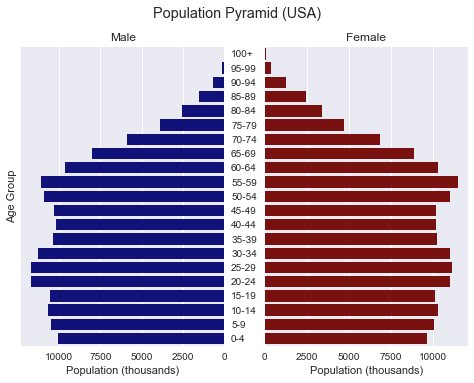

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract USA population data in 2017
current_population = population_df[(population_df.Location == 'United States of America') & 
                                   (population_df.Time == 2017) &
                                   (population_df.Sex != 'Both')]

# Change the age group to descending order
current_population = current_population.iloc[::-1]

# Create two subplots with shared y-axis
fig, axes = plt.subplots(ncols=2, sharey=True)

# Bar chart for male
sns.barplot(x="Value",y="AgeGrp", color="darkblue", ax=axes[0],
            data = current_population[(current_population.Sex == 'Male')])
# Bar chart for female
sns.barplot(x="Value",y="AgeGrp", color="darkred", ax=axes[1],
            data = current_population[(current_population.Sex == 'Female')])

# Use Matplotlib function to invert the first chart
axes[0].invert_xaxis()

# Use Matplotlib function to show tick labels in the middle
axes[0].yaxis.tick_right()

# Use Matplotlib functions to label the axes and titles
axes[0].set_title("Male")
axes[1].set_title("Female")
axes[0].set(xlabel="Population (thousands)", ylabel="Age Group")
axes[1].set(xlabel="Population (thousands)", ylabel="")
fig.suptitle("Population Pyramid (USA)")

# Show the figure
plt.savefig("../images/ch04/B07915_04_USA_population_pyramid.png", dpi=300)
plt.show()

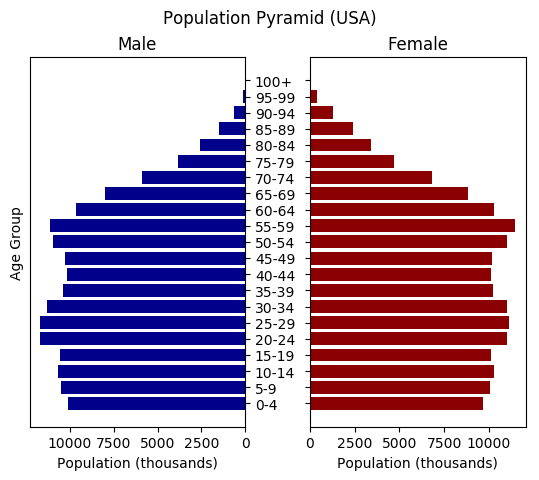

In [78]:
import matplotlib.pyplot as plt
import numpy as np


# Extract USA population data in 2017
current_population = population_df[(population_df.Location == 'United States of America') & 
                                   (population_df.Time == 2017) &
                                   (population_df.Sex != 'Both')]

# Create two subplots with shared y-axis
fig, axes = plt.subplots(ncols=2, sharey=True)

#---------------Pure Matplotlib barplot implementation---------------
# Get a list of tick positions according to the data bins
y_pos = range(len(current_population.AgeGrp.unique()))

# Horizontal barchart for male
axes[0].barh(y_pos, current_population[(current_population.Sex == 'Male')].Value, 
             color="darkblue")

# Horizontal barchart for female
axes[1].barh(y_pos, current_population[(current_population.Sex == 'Female')].Value, 
             color="darkred")

# Show tick for each data point, and label with the age group
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(current_population.AgeGrp.unique())
#-------------End pure Matplotlib barplot implementation-------------

# Invert the first chart
axes[0].invert_xaxis()

# Show tick labels in the middle
axes[0].yaxis.tick_right()

# Label the axes and titles
axes[0].set_title("Male")
axes[1].set_title("Female")
axes[0].set(xlabel="Population (thousands)", ylabel="Age Group")
axes[1].set(xlabel="Population (thousands)", ylabel="")
fig.suptitle("Population Pyramid (USA)")

# Increase spacing between subplots to avoid clipping of ytick labels
plt.subplots_adjust(wspace=0.3)

# Show the figure
plt.savefig("../images/ch04/B07915_04_USA_population_pyramid_mpl.png", dpi=300)
plt.show()

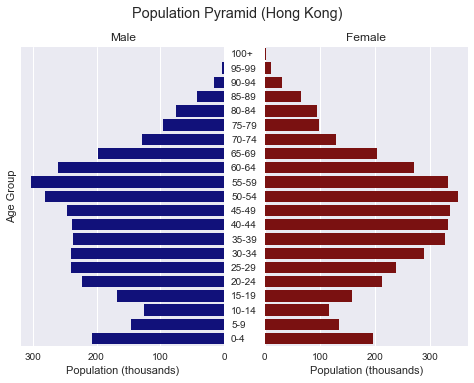

In [15]:
#Not to be shown in text

import seaborn as sns
import matplotlib.pyplot as plt

# show this line only in text
current_population = population_df[(population_df.Location == 'China, Hong Kong SAR') & 
                                   (population_df.Time == 2017) ]

current_population = current_population.iloc[::-1]

fig, axes = plt.subplots(ncols=2, sharey=True)
sns.barplot(x="Value",y="AgeGrp", color="darkblue", ax=axes[0],
            data = current_population[(current_population.Sex == 'Male')])
sns.barplot(x="Value",y="AgeGrp", color="darkred", ax=axes[1],
            data = current_population[(current_population.Sex == 'Female')])

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()

axes[0].set_title("Male")
axes[1].set_title("Female")
axes[0].set_xlabel("Population (thousands)")
axes[1].set_xlabel("Population (thousands)")
axes[0].set_ylabel("Age Group")
axes[1].set_ylabel('')
axes[0].set_xlabel("Population (thousands)")

fig.suptitle("Population Pyramid (Hong Kong)")
plt.savefig("../images/ch04/B07915_04_hk_population_pyramid.png", dpi=300)
plt.show()

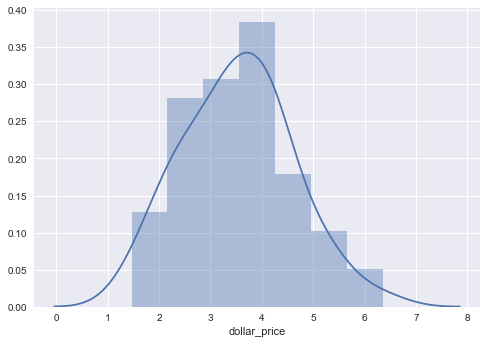

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the BigMac index in 2017
current_bigmac = bigmac_df[(bigmac_df.Date == "2017-01-31")]

# Plot the histogram
ax = sns.distplot(current_bigmac.dollar_price)
plt.savefig("../images/ch04/B07915_04_simple_distplot.png", dpi=300)
plt.show()

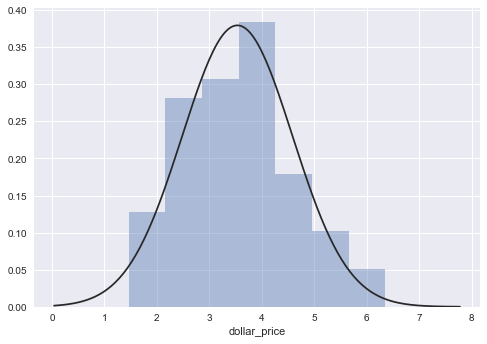

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Get the BigMac index in 2017
current_bigmac = bigmac_df[(bigmac_df.Date == "2017-01-31")]

# Plot the histogram, turn off KDE curve, and fit a normal distribution over the data
ax = sns.distplot(current_bigmac.dollar_price, kde=False, fit=stats.norm)
plt.savefig("../images/ch04/B07915_04_norm_distplot.png", dpi=300)
plt.show()

In [11]:
import urllib
import json
import pandas as pd
import time
from urllib.request import urlopen


def get_gdp_dataset(api_key, country_code):
    """Obtain and parse a quandl GDP dataset in Pandas DataFrame format

    Quandl returns dataset in JSON format, where data is stored as a 
    list of lists in response['dataset']['data'], and column headers
    stored in response['dataset']['column_names'].
    
    Args:
        api_key: Quandl API key
        country_code: Three letter code to represent country

    Returns:
        df: Pandas DataFrame of a Quandl dataset

    """
    base_url = "https://www.quandl.com/api/v3/datasets/"
    url_suffix = ".json?api_key="
    
    # Compose the Quandl API dataset code to get GDP per capita (constant 2000 US$) dataset
    gdp_code = "WWDI/" + country_code + "_NY_GDP_PCAP_KD"
    
    # Parse the JSON response from Quandl API
    # Some countries might be missing, so we need error handling code
    try:
        u = urlopen(base_url + gdp_code + url_suffix + api_key)
    except urllib.error.URLError as e:
        print(gdp_code,e)
        return None
        
    response = json.loads(u.read().decode('utf-8'))
    
    # Format the response as Pandas Dataframe
    df = pd.DataFrame(response['dataset']['data'], columns=response['dataset']['column_names'])
    
    # Add a new country code column
    df['country'] = country_code
    
    return df


api_key = "sGHKyHvLbvH1_yfvnUyb"  #Change this to your own API key

quandl_dfs = []

# Loop through all unique country code values in the BigMac index DataFrame
for country_code in bigmac_df.country.unique():
    # Fetch the GDP dataset for the corresponding country 
    df = get_gdp_dataset(api_key, country_code)
    
    # Skip if the response is empty
    if df is None:
        continue
        
    # Store in a list DataFrames
    quandl_dfs.append(df)
    
    # Prevents exceeding the API speed limit
    time.sleep(2)
    
    
# Concatenate the list of DataFrames into a single one    
gdp_df = pd.concat(quandl_dfs)
gdp_df.head()

WWDI/EUR_NY_GDP_PCAP_KD HTTP Error 404: Not Found
WWDI/SIN_NY_GDP_PCAP_KD HTTP Error 404: Not Found
WWDI/ROC_NY_GDP_PCAP_KD HTTP Error 404: Not Found
WWDI/UAE_NY_GDP_PCAP_KD HTTP Error 404: Not Found


,Date,Value,country
0,2015-12-31,10501.660269,ARG
1,2014-12-31,10334.780146,ARG
2,2013-12-31,10711.229530,ARG
3,2012-12-31,10558.265365,ARG
4,2011-12-31,10780.342508,ARG


In [12]:
merged_df = pd.merge(bigmac_df[(bigmac_df.Date == "2015-01-31")], gdp_df[(gdp_df.Date == "2015-12-31")], how='inner', on='country')
merged_df.head()

,Date_x,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation,country,Date_y,Value
0,2015-01-31,28.00,8.610000,3.252033,5.845511,-32.107881,0.540242,-0.804495,-2.49468,34.3905,6.01183,ARG,2015-12-31,10501.660269
1,2015-01-31,5.30,1.227220,4.318705,1.106472,-9.839144,-17.8995,-18.9976,-20.3778,9.74234,-13.4315,AUS,2015-12-31,54688.445933
2,2015-01-31,13.50,2.592750,5.206827,2.818372,8.702019,68.4555,66.2024,63.3705,125.172,77.6231,BRA,2015-12-31,11211.891104
3,2015-01-31,2.89,0.661594,4.368235,0.603340,-8.805115,3.11257,1.73343,0,37.8289,8.72415,GBR,2015-12-31,41182.619517
4,2015-01-31,5.70,1.228550,4.639616,1.189979,-3.139545,-2.34134,-3.64753,-5.28928,30.5387,2.97343,CAN,2015-12-31,50108.065004


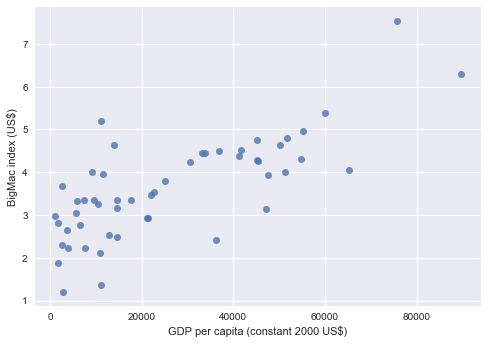

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt


# seaborn.regplot() returns matplotlib.Axes object
ax = sns.regplot(x="Value", y="dollar_price", data=merged_df, fit_reg=False)
ax.set_xlabel("GDP per capita (constant 2000 US$)")
ax.set_ylabel("BigMac index (US$)")

plt.savefig("../images/ch04/B07915_04_simple_scatter.png", dpi=300)
plt.show()

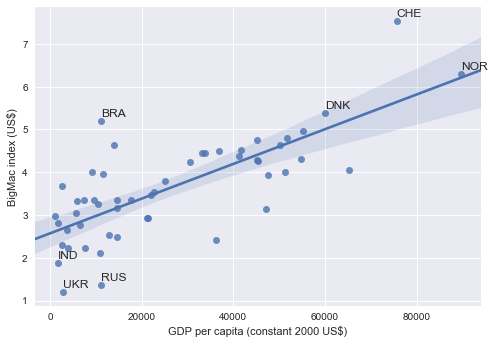

In [142]:
ax = sns.regplot(x="Value", y="dollar_price", data=merged_df)
ax.set_xlabel("GDP per capita (constant 2000 US$)")
ax.set_ylabel("BigMac index (US$)")

# Label the country code for those who demonstrate extreme BigMac index
for row in merged_df.itertuples():
    if row.dollar_price >= 5 or row.dollar_price <= 2:
        ax.text(row.Value,row.dollar_price+0.1,row.country)

plt.savefig("../images/ch04/B07915_04_scatter_labelled.png", dpi=300)
plt.show()

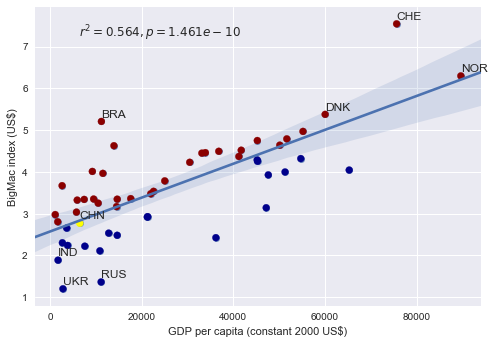

In [141]:
from scipy.stats import linregress


ax = sns.regplot(x="Value", y="dollar_price", data=merged_df)
ax.set_xlabel("GDP per capita (constant 2000 US$)")
ax.set_ylabel("BigMac index (US$)")

# Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = linregress(merged_df.Value, merged_df.dollar_price)

colors = []
for row in merged_df.itertuples():
    if row.dollar_price > row.Value * slope + intercept:
        # Color markers as darkred if they are above the regression line
        color = "darkred"
    else:
        # Color markers as darkblue if they are below the regression line
        color = "darkblue"
    
    # Label the country code for those who demonstrate extreme BigMac index
    if row.dollar_price >= 5 or row.dollar_price <= 2:
        ax.text(row.Value,row.dollar_price+0.1,row.country)
        
    # Highlight the marker that corresponds to China
    if row.country == "CHN":
        t = ax.text(row.Value,row.dollar_price+0.1,row.country)
        color = "yellow"
    
    colors.append(color)

# Overlay another scatter plot on top with marker-specific color
ax.scatter(merged_df.Value, merged_df.dollar_price, c=colors)

# Label the r squared value and p value of the linear regression model.
# transform=ax.transAxes indicates that the coordinates are given relative to the axes bounding box, 
# with 0,0 being the lower left of the axes and 1,1 the upper right.
ax.text(0.1, 0.9, "$r^2={0:.3f}, p={1:.3e}$".format(r_value ** 2, p_value), transform=ax.transAxes)

plt.savefig("../images/ch04/B07915_04_scatter_colored.png", dpi=300)
plt.show()

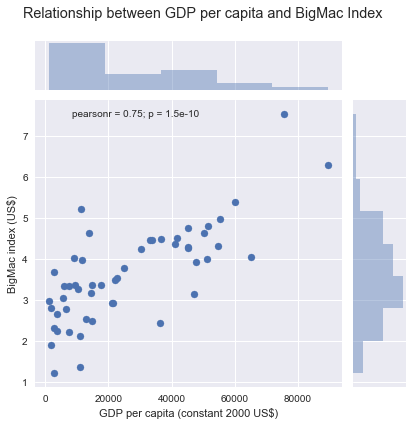

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt


# seaborn.jointplot() returns a seaborn.JointGrid object
g = sns.jointplot(x="Value", y="dollar_price", data=merged_df)

# Provide custom axes labels through accessing the underlying axes object
# We can get matplotlib.axes.Axes of the scatter plot by calling g.ax_joint
g.ax_joint.set_xlabel("GDP per capita (constant 2000 US$)")
g.ax_joint.set_ylabel("BigMac index (US$)")

# Set the title and adjust the margin
g.fig.suptitle("Relationship between GDP per capita and BigMac Index")
g.fig.subplots_adjust(top=0.9)
plt.savefig("../images/ch04/B07915_04_jointplot_scatter.png", dpi=300)
plt.show()

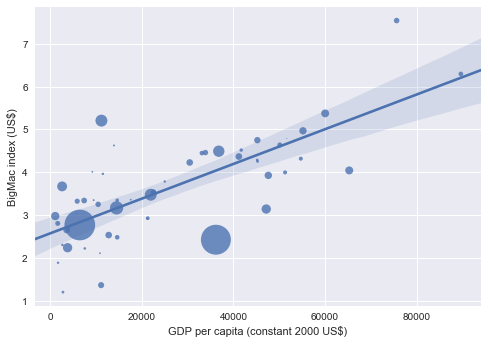

In [13]:
import numpy as np


current_population = population_df[(population_df.Time == 2015) &
                                   (population_df.Sex == 'Both')].groupby(['country', 'Time']
                                                                          , as_index=False).sum()
median_population = float(current_population.Value.median())

sizes = []
for row in merged_df.itertuples():
    try:
        country_population = float(current_population[current_population.country == row.country].Value)
    except:
        continue
    sizes.append(5 * country_population / median_population)

ax = sns.regplot(x="Value", y="dollar_price", data=merged_df, scatter_kws={"s": sizes})
ax.set_xlabel("GDP per capita (constant 2000 US$)")
ax.set_ylabel("BigMac index (US$)")

plt.savefig("../images/ch04/B07915_04_bubble.png", dpi=300)
plt.show()

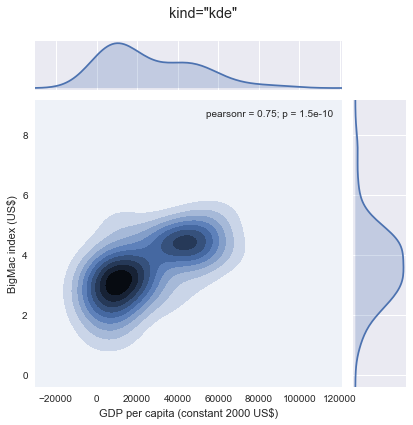

In [77]:
#Not to be shown in book
import seaborn as sns
import matplotlib.pyplot as plt


# seaborn.jointplot() returns a seaborn.JointGrid object
g = sns.jointplot(x="Value", y="dollar_price", data=merged_df, kind="kde")

# Provide custom axes labels through accessing the underlying axes object
g.ax_joint.set_xlabel("GDP per capita (constant 2000 US$)")
g.ax_joint.set_ylabel("BigMac index (US$)")
g.fig.suptitle('kind="kde"')
g.fig.subplots_adjust(top=0.9)
plt.savefig("../images/ch04/B07915_04_jointplot_kde.png", dpi=300)
plt.show()

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


current_population = population_df[(population_df.Time == 2015) &
                                   (population_df.Sex == 'Both')]

pop_type_list = []
for country in merged_df.country.unique():
    if not country in current_population.country.values:
        continue
        
    young = current_population[(current_population.country == country) &
                               (current_population.AgeGrp == "0-4")].Value
    
    midage = current_population[(current_population.country == country) &
                               (current_population.AgeGrp == "50-54")].Value
    
    ratio = float(young) / float(midage)
    
    if ratio < 0.8:
        pop_type = "constrictive"
    elif ratio < 1.2 and ratio >= 0.8:
        pop_type = "stable"
    else:
        pop_type = "expansive"
        
    pop_type_list.append([country, ratio, pop_type])
    
pop_type_df = pd.DataFrame(pop_type_list, columns=['country','ratio','population type'])
merged_df2 = pd.merge(merged_df, pop_type_df, how='inner', on='country')
merged_df2.head()

,Date_x,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation,country,Date_y,Value,ratio,population type
0,2015-01-31,28.00,8.610000,3.252033,5.845511,-32.107881,0.540242,-0.804495,-2.49468,34.3905,6.01183,ARG,2015-12-31,10501.660269,1.695835,expansive
1,2015-01-31,5.30,1.227220,4.318705,1.106472,-9.839144,-17.8995,-18.9976,-20.3778,9.74234,-13.4315,AUS,2015-12-31,54688.445933,0.961301,stable
2,2015-01-31,13.50,2.592750,5.206827,2.818372,8.702019,68.4555,66.2024,63.3705,125.172,77.6231,BRA,2015-12-31,11211.891104,1.217728,expansive
3,2015-01-31,2.89,0.661594,4.368235,0.603340,-8.805115,3.11257,1.73343,0,37.8289,8.72415,GBR,2015-12-31,41182.619517,0.872431,stable
4,2015-01-31,5.70,1.228550,4.639616,1.189979,-3.139545,-2.34134,-3.64753,-5.28928,30.5387,2.97343,CAN,2015-12-31,50108.065004,0.690253,constrictive


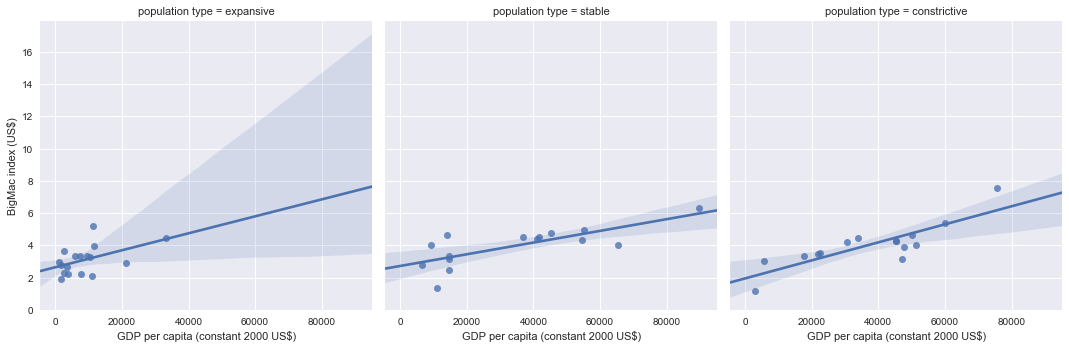

In [15]:
# Horizontal faceted grids (col="population type")
g = sns.lmplot(x="Value", y="dollar_price", col="population type", data=merged_df2)
g.set_xlabels("GDP per capita (constant 2000 US$)")
g.set_ylabels("BigMac index (US$)")

plt.savefig("../images/ch04/B07915_04_categorical_scatter_col.png", dpi=300)
plt.show()

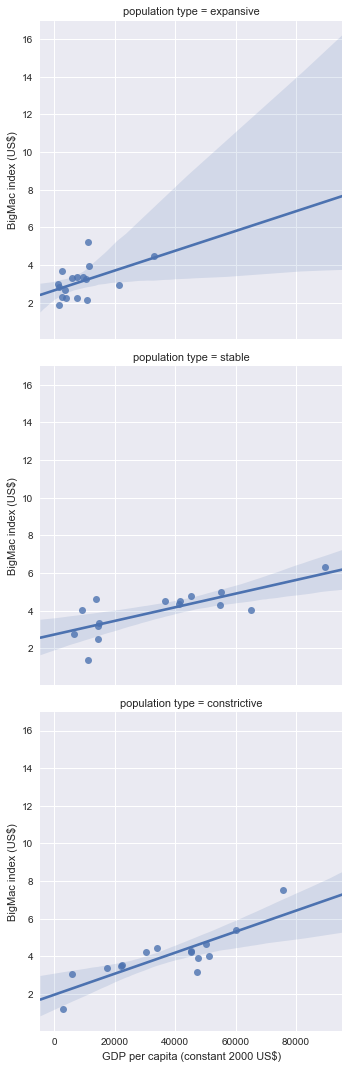

In [17]:
# Vertical faceted grids (row="population type")
g = sns.lmplot(x="Value", y="dollar_price", row="population type", data=merged_df2)
g.set_xlabels("GDP per capita (constant 2000 US$)")
g.set_ylabels("BigMac index (US$)")

plt.savefig("../images/ch04/B07915_04_categorical_scatter_row.png", dpi=300)
plt.show()

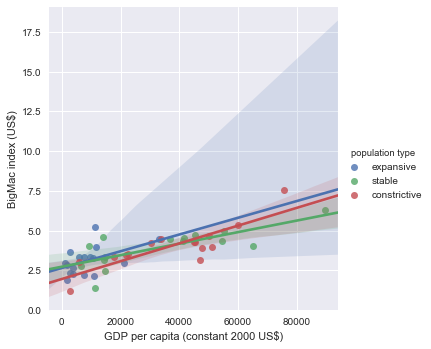

In [16]:
# Color-coded scatter plot (hue="population type")
g = sns.lmplot(x="Value", y="dollar_price", hue="population type", data=merged_df2)
g.set_xlabels("GDP per capita (constant 2000 US$)")
g.set_ylabels("BigMac index (US$)")  

plt.savefig("../images/ch04/B07915_04_categorical_scatter_hue.png", dpi=300)
plt.show()

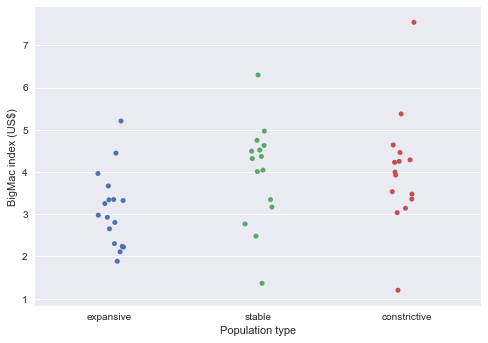

In [18]:
# Strip plot with jitter value
ax = sns.stripplot(x="population type", y="dollar_price", data=merged_df2, jitter=True)
ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)")  

plt.savefig("../images/ch04/B07915_04_categorical_strip.png", dpi=300)
plt.show()

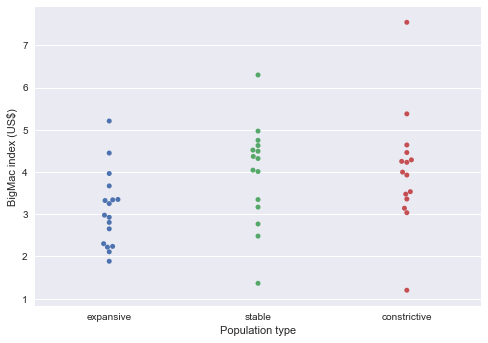

In [19]:
# Swarm plot
ax = sns.swarmplot(x="population type", y="dollar_price", data=merged_df2)
ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)") 

plt.savefig("../images/ch04/B07915_04_categorical_swarm.png", dpi=300)
plt.show()

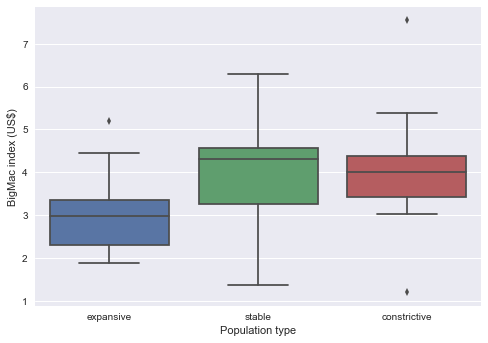

In [20]:
# Box plot
ax = sns.boxplot(x="population type", y="dollar_price", data=merged_df2)
ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)")  

plt.savefig("../images/ch04/B07915_04_categorical_box.png", dpi=300)
plt.show()

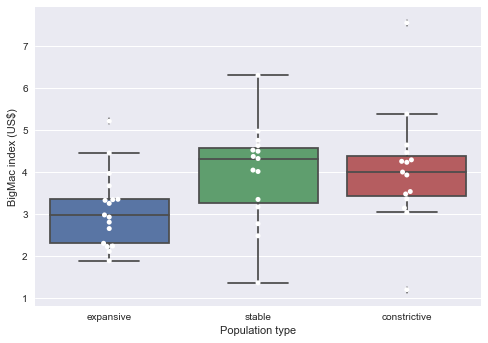

In [21]:
# Prepare a box plot
ax = sns.boxplot(x="population type", y="dollar_price", data=merged_df2)

# Overlay a swarm plot on top of the same axes
sns.swarmplot(x="population type", y="dollar_price", data=merged_df2, color="w", ax=ax)
ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)")  

plt.savefig("../images/ch04/B07915_04_categorical_box2.png", dpi=300)
plt.show()

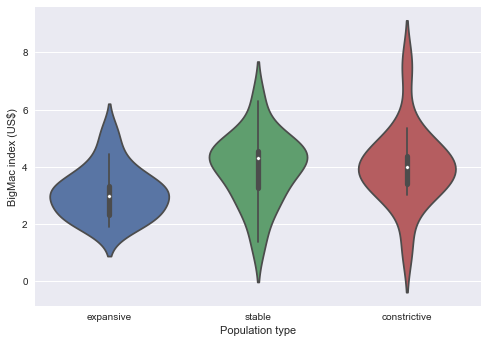

In [22]:
# Violin plot 
ax = sns.violinplot(x="population type", y="dollar_price", data=merged_df2)

ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)")  

plt.savefig("../images/ch04/B07915_04_categorical_violin.png", dpi=300)
plt.show()

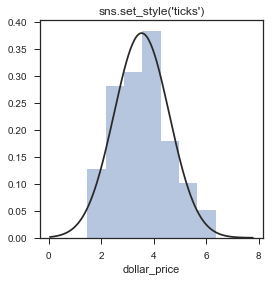

In [20]:
# NOTE: Code won't be shown in book!

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig = plt.figure(figsize=(4,4))

style = "ticks"
sns.set_style(style)

# Get the BigMac index in 2017
current_bigmac = bigmac_df[(bigmac_df.Date == "2017-01-31")]

# Plot the histogram, turn off KDE curve, and fit a normal distribution over the data
ax = sns.distplot(current_bigmac.dollar_price, kde=False, fit=stats.norm)

plt.title("sns.set_style('%s')" % style)
plt.savefig("../images/ch04/B07915_04_seabornthemes5.png", dpi=300)
plt.show()

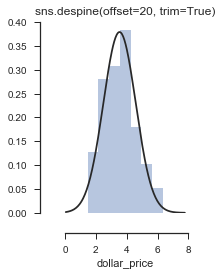

In [11]:
# NOTE: Code won't be shown in book!

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig = plt.figure(figsize=(3,4))

style = "ticks"
sns.set_style(style)

# Get the BigMac index in 2017
current_bigmac = bigmac_df[(bigmac_df.Date == "2017-01-31")]

# Plot the histogram, turn off KDE curve, and fit a normal distribution over the data
ax = sns.distplot(current_bigmac.dollar_price, kde=False, fit=stats.norm)
sns.despine(offset=20, trim=True)
plt.title("sns.despine(offset=20, trim=True)")
plt.tight_layout()
plt.savefig("../images/ch04/B07915_04_seaborndespine2.png", dpi=300)

plt.show()

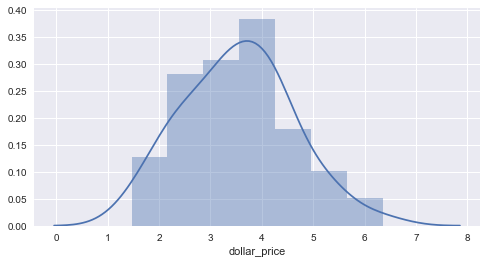

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Note: Codes related to data preparation are skipped for brevity
# Reset all previous theme settings to defaults
sns.set()

# Change the size to 8 inches wide and 4 inches tall
fig = plt.figure(figsize=(8,4))

# We are going to reuse current_bigmac that was generated earlier
# Plot the histogram
ax = sns.distplot(current_bigmac.dollar_price)
plt.savefig("../images/ch04/B07915_04_seaborn_figsize.png", dpi=300)
plt.show()

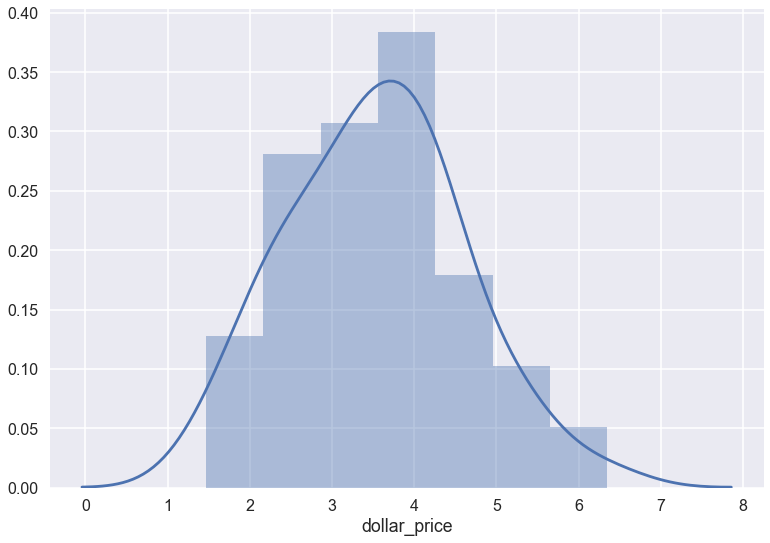

In [8]:
# Reset all previous theme settings to defaults
sns.set()

# Set Seaborn context to poster
sns.set_context("poster")

# We are going to reuse current_bigmac that was generated earlier
# Plot the histogram
ax = sns.distplot(current_bigmac.dollar_price)
plt.savefig("../images/ch04/B07915_04_seaborn_figsize_poster.png", dpi=300)
plt.show()

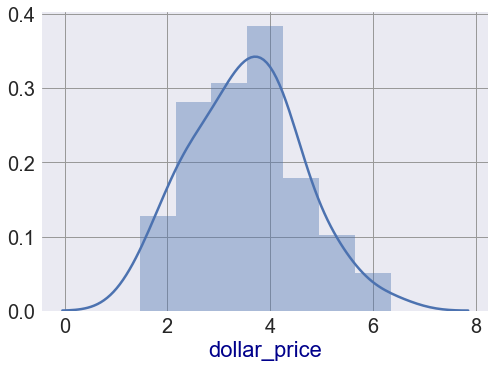

In [24]:
# Get a dictionary of all parameters that can be changed
sns.axes_style()

"""
Returns
{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'DejaVu Sans',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': u'-',
 'image.cmap': u'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}
 """

# Increase the font scale to 2, change the grid color to light grey, 
# and axes label color to dark blue
sns.set(context="notebook", 
        style="darkgrid",
        font_scale=2, 
        rc={'grid.color': '0.6', 
            'axes.labelcolor':'darkblue',
            "lines.linewidth": 2.5})

# Plot the histogram
ax = sns.distplot(current_bigmac.dollar_price)
plt.savefig("../images/ch04/B07915_04_seaborn_figsize_rc.png", dpi=300)
plt.show()

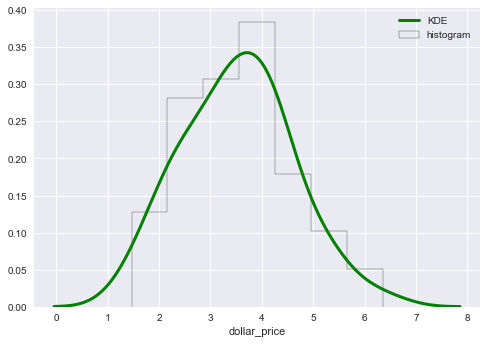

In [49]:
# Note: Codes related to data preparation and imports are skipped for brevity
# Reset the style
sns.set(context="notebook", 
        style="darkgrid")

# Plot the histogram with custom style
ax = sns.distplot(current_bigmac.dollar_price,
                 kde_kws={"color": "g", 
                          "linewidth": 3, 
                          "label": "KDE"},
                 hist_kws={"histtype": "step", 
                           "alpha": 1, 
                           "color": "k",
                           "label": "histogram"})
plt.savefig("../images/ch04/B07915_04_seaborn_diststyle.png", dpi=300)
plt.show()

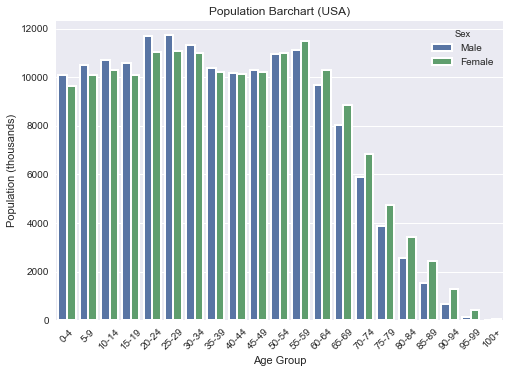

In [39]:
# Note: Codes related to data preparation and imports are skipped for brevity
# Population Bar chart 
sns.barplot(x="AgeGrp",y="Value", hue="Sex",
            linewidth=2, edgecolor="w",
            data = current_population)

# Use Matplotlib functions to label axes rotate tick labels
ax = plt.gca()
ax.set(xlabel="Age Group", ylabel="Population (thousands)")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
plt.title("Population Barchart (USA)")

# Show the figure
plt.savefig("../images/ch04/B07915_04_population_bar_style.png", dpi=300)
plt.show()

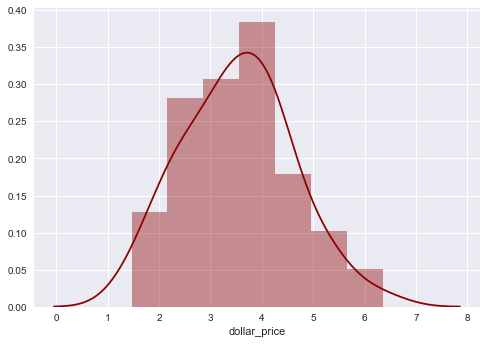

In [46]:
ax = sns.distplot(current_bigmac.dollar_price, color="darkred")
plt.savefig("../images/ch04/B07915_04_seaborn_distcolor.png", dpi=300)
plt.show()

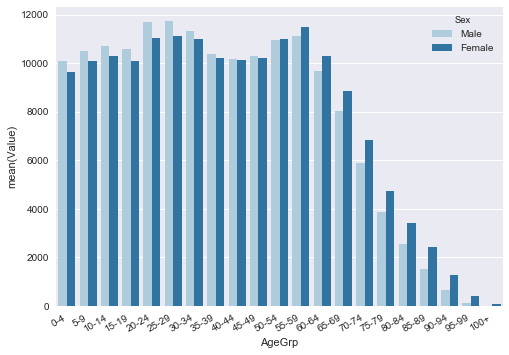

In [18]:
current_population = population_df[(population_df.Location == 'United States of America') & 
                                   (population_df.Time == 2017) &
                                   (population_df.Sex != 'Both')]


# Change the color palette of the bar chart to Paired
sns.barplot(x="AgeGrp",y="Value", hue="Sex", palette="Paired", data = current_population)

# Rotate tick labels by 30 degree
plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')
# Show the figure
plt.savefig("../images/ch04/B07915_04_population_bar_palette.png", dpi=300)

plt.show()

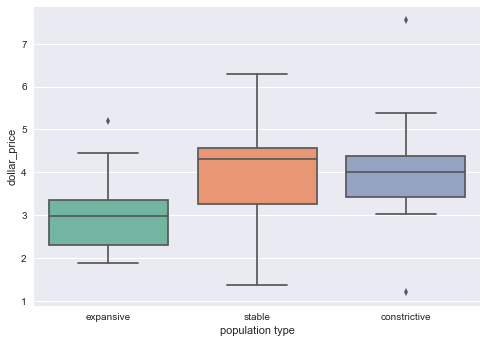

In [81]:
# Note: Codes related to data preparation and imports are skipped for brevity
# Change the color palette of the bar chart to Set2 from color brewer library
ax = sns.boxplot(x="population type", y="dollar_price", palette="Set2", data=merged_df2)

# Show the figure
plt.savefig("../images/ch04/B07915_04_population_box_palette.png", dpi=300)
plt.show()

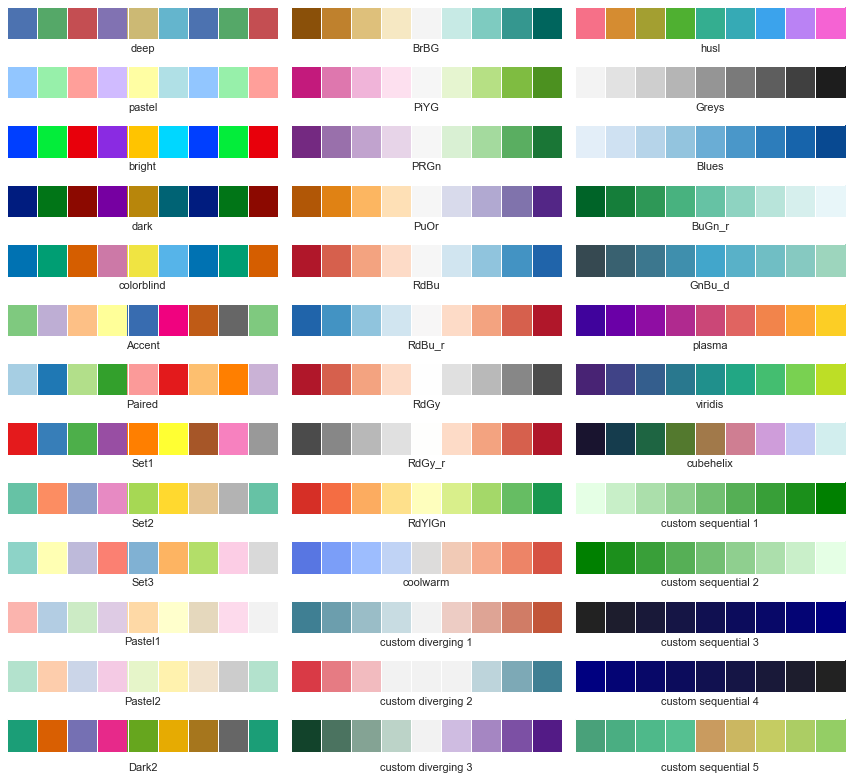

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def palplot(pal, ax):
    """Plot the values in a color palette as a horizontal array.
    Adapted from seaborn.palplot
    
    Args:
        p : seaborn color palette
        ax : axes to plot the color palette
    """
    n = len(pal)    
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    
palettes = {"qualitative": ["deep", "pastel", "bright", "dark", 
                            "colorblind", "Accent", "Paired", 
                            "Set1", "Set2", "Set3", "Pastel1", 
                            "Pastel2", "Dark2"],
            "diverging": ["BrBG", "PiYG", "PRGn", "PuOr", "RdBu", 
                          "RdBu_r", "RdGy", "RdGy_r", "RdYlGn", 
                          "coolwarm"],
            "sequential": ["husl", "Greys", "Blues", "BuGn_r", 
                           "GnBu_d", "plasma", "viridis","cubehelix"]}

#Reset to default Seaborn style
sns.set()

# Create one subplot per palette, the x-axis is shared
fig, axarr = plt.subplots(13, 3, sharex=True, figsize=(12,11))

# Plot 9 color blocks for each palette
for i, palette_type in enumerate(palettes.keys()):
    for j, palette in enumerate(palettes[palette_type]):
        pal = sns.color_palette(palettes[palette_type][j], 9)
        palplot(pal, axarr[j,i])
        axarr[j,i].set_xlabel(palettes[palette_type][j])
        
# Plot a few more custom diverging palette
custom_diverging_palette = [
    sns.diverging_palette(220, 20, n=9),
    sns.diverging_palette(10, 220, sep=80, n=9),
    sns.diverging_palette(145, 280, s=85, l=25, n=9)
]

for i, palette in enumerate(custom_diverging_palette):
    palplot(palette, axarr[len(palettes["diverging"])+i,1])
    axarr[len(palettes["diverging"])+i,1].set_xlabel("custom diverging {}".format(i+1))

# Plot a few more custom sequential palette
other_custom_palette = [
    sns.light_palette("green", 9),
    sns.light_palette("green", 9, reverse=True),
    sns.dark_palette("navy", 9),
    sns.dark_palette("navy", 9, reverse=True),
    sns.color_palette(["#49a17a","#4aae82","#4eb98a","#55c091","#c99b5f",
                       "#cbb761","#c5cc62","#accd64","#94ce65"])
]

for i, palette in enumerate(other_custom_palette):
    palplot(palette, axarr[len(palettes["sequential"])+i,2])
    axarr[len(palettes["sequential"])+i,2].set_xlabel("custom sequential {}".format(i+1))


# Reduce unnecessary margin space
plt.tight_layout()
plt.savefig("../images/ch04/B07915_04_palettes.png", dpi=300)
# Show the plot
plt.show()